## Modeling GDP Data Using ARIMA Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the GDP data from the Federal Reserve Bank of 
# St. Louis Economic Data website: https://fred.stlouisfed.org/

gdp = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=A191RL1Q225SBEA&scale=left&cosd=1947-04-01&coed=2018-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-01-08&revision_date=2019-01-08&nd=1947-04-01')
gdp.head()

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


In [3]:
# Check datatypes
gdp.dtypes

DATE                object
A191RL1Q225SBEA    float64
dtype: object

In [4]:
# Change index to the datetime format of the 'DATE' column

gdp.index = pd.to_datetime(gdp['DATE'])

gdp.head()

,DATE,A191RL1Q225SBEA
DATE,,
1947-04-01,1947-04-01,-1.0
1947-07-01,1947-07-01,-0.8
1947-10-01,1947-10-01,6.4
1948-01-01,1948-01-01,6.2
1948-04-01,1948-04-01,6.8


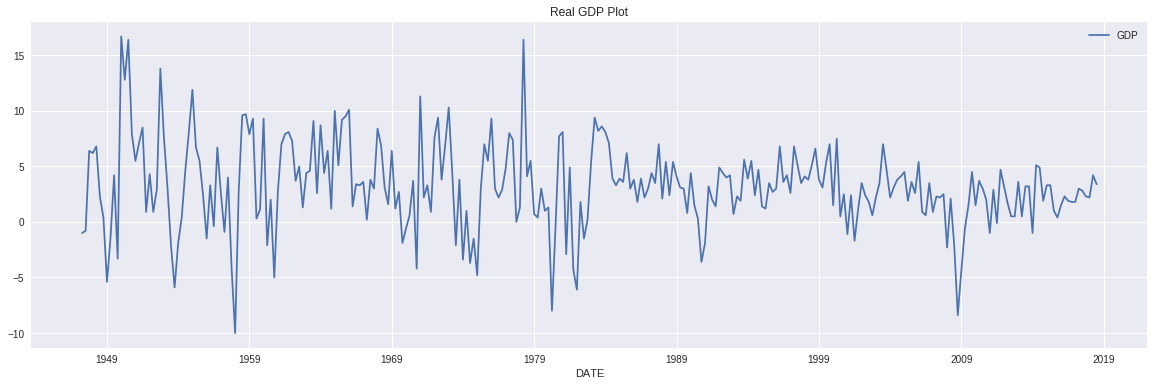

In [5]:
# Plot the data
plt.rcParams['figure.figsize'] = (20,6)
gdp.plot()
plt.title('Real GDP Plot')
plt.legend(['GDP'])
plt.show()

In [0]:
# Import the Autocorrelation pkg and remove the 'DATE'
# column since the index reflects those dates
from pandas.plotting import autocorrelation_plot
gdp.drop('DATE', axis=1, inplace=True)

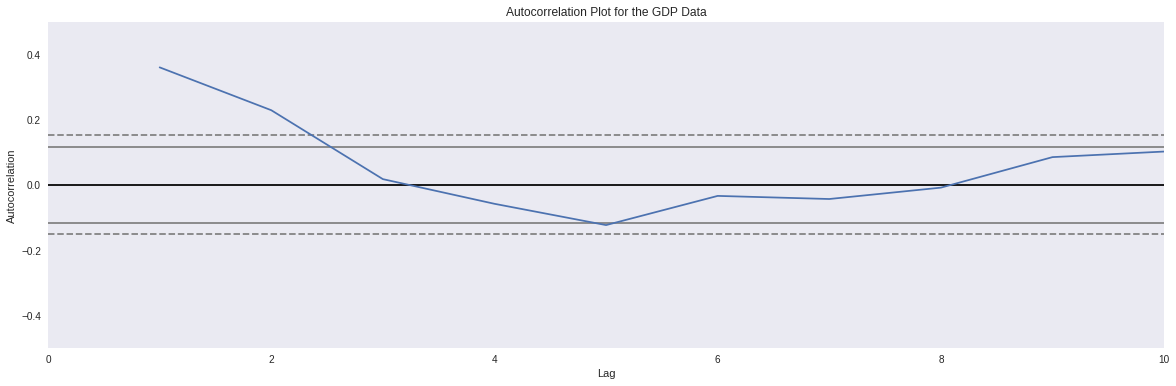

In [7]:
# Plot the autocorrelation data
autocorrelation_plot(gdp)
plt.title('Autocorrelation Plot for the GDP Data')
plt.xlim(0,10)
plt.ylim(-0.5,0.5)
plt.show()

# p-value == 2 or 3
# since the trend drops into critical range
# between 2 and 3

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


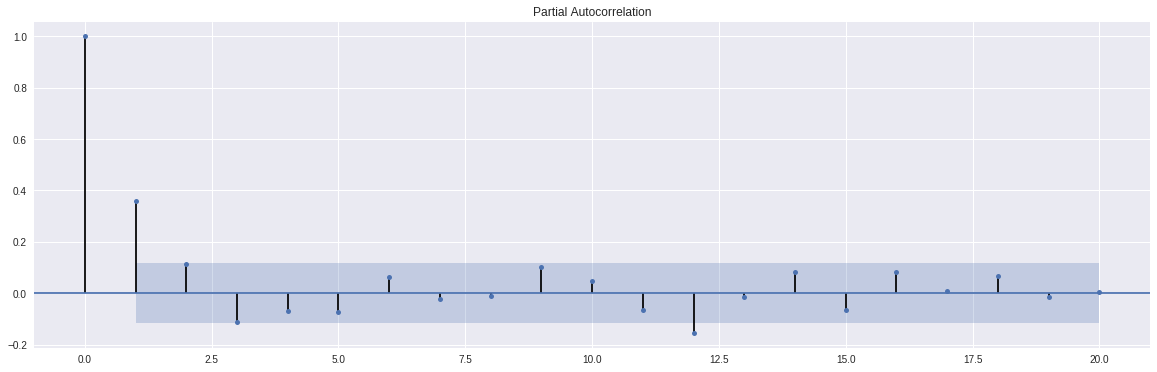

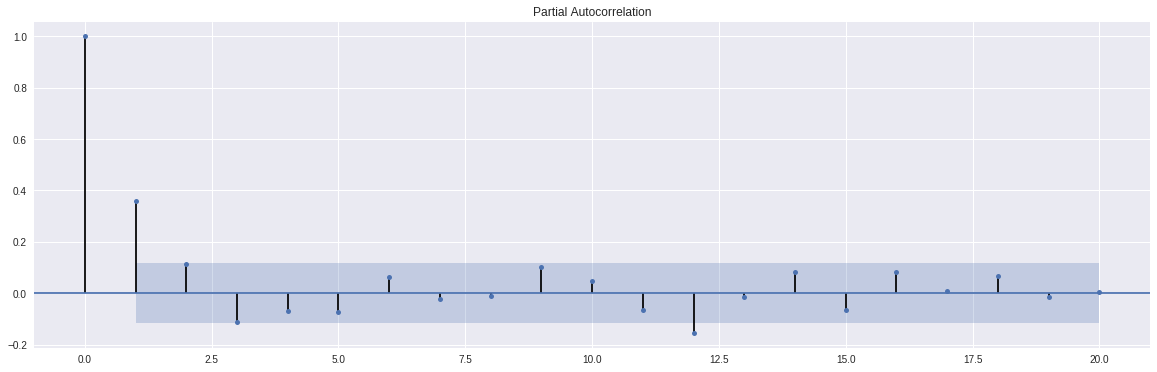

In [8]:
# Plot partial autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gdp, lags=20)

# q-value == 2
# since there are two lags outside
# the critical range
# and d is usually 1 or 2

In [0]:
from statsmodels.tsa.arima_model import ARIMA

## ARIMA - (2,1,2)

In [0]:
# Instantiate ARIMA and fit to the GDP dataset 
# with p,d,q parameters = 2,1,2
model212 = ARIMA(gdp, order=(2,1,2))

In [11]:
model212_fit = model212.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  285
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -767.582
Method:                       css-mle   S.D. of innovations              3.546
Date:                Wed, 09 Jan 2019   AIC                           1547.163
Time:                        00:19:28   BIC                           1569.078
Sample:                    07-01-1947   HQIC                          1555.948
                         - 07-01-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.812      0.071      -0.016       0.001
ar.L1.D.A191RL1Q225SBEA    -0.2660      0.270     -0.986      0.325      -0.795       0.263


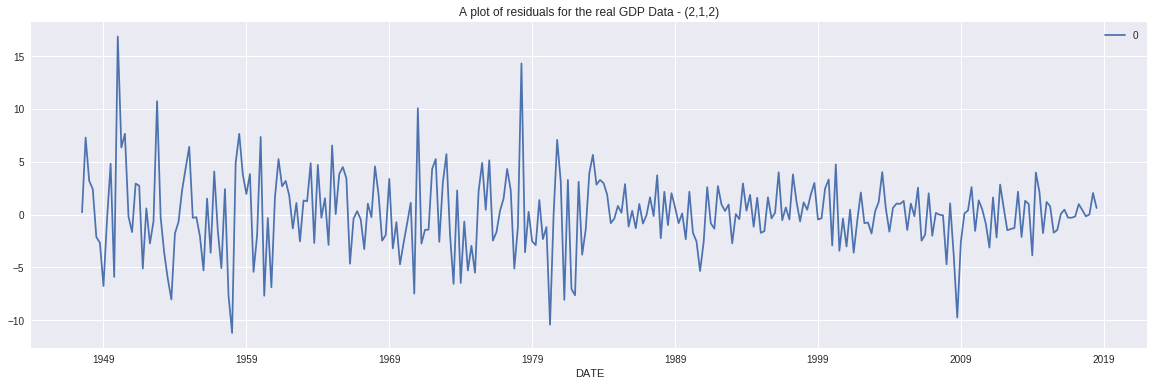

In [12]:
# Show results
print(model212_fit.summary())
print('Residuals Decription')
resid = pd.DataFrame(model212_fit.resid)

# Plot residuals 
resid.plot()
plt.title('A plot of residuals for the real GDP Data - (2,1,2)')
plt.show()

# The lack of a trend in the residuals plot indicates that the model
# is well-tuned. Not necessary to alter the AR value or the order of differencing

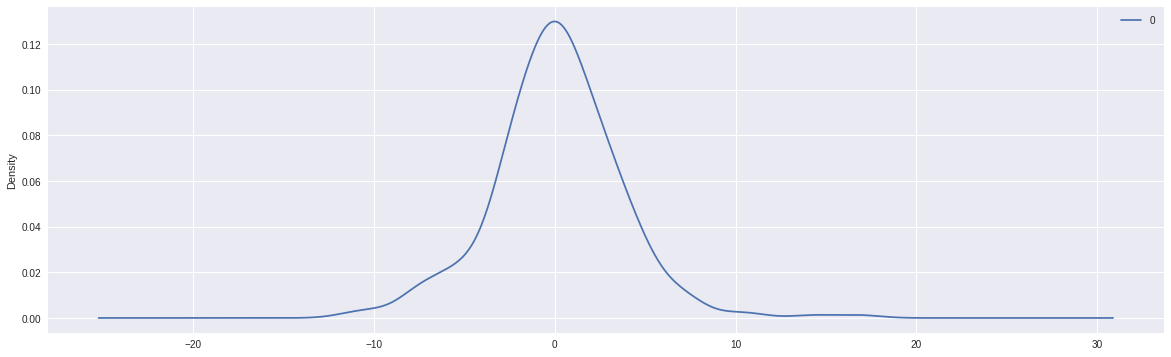

In [13]:
resid.plot(kind='kde')

# Values of the residuals are normally distributed

In [14]:
print(resid.describe())

# The mean value close to zero
# Again indicates that the model is well-tuned

                0
count  285.000000
mean     0.107798
std      3.598300
min    -11.209008
25%     -1.791719
50%      0.046196
75%      2.125928
max     16.853338


## ARIMA - (1,1,2) - did not converge

In [15]:
model112 = ARIMA(gdp, order=(1,1,2))
model112_fit = model112.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  285
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -769.534
Method:                       css-mle   S.D. of innovations              3.571
Date:                Wed, 09 Jan 2019   AIC                           1549.068
Time:                        00:19:29   BIC                           1567.331
Sample:                    07-01-1947   HQIC                          1556.389
                         - 07-01-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.828      0.069      -0.016       0.001
ar.L1.D.A191RL1Q225SBEA     0.4883      0.110      4.429      0.000       0.272       0.704


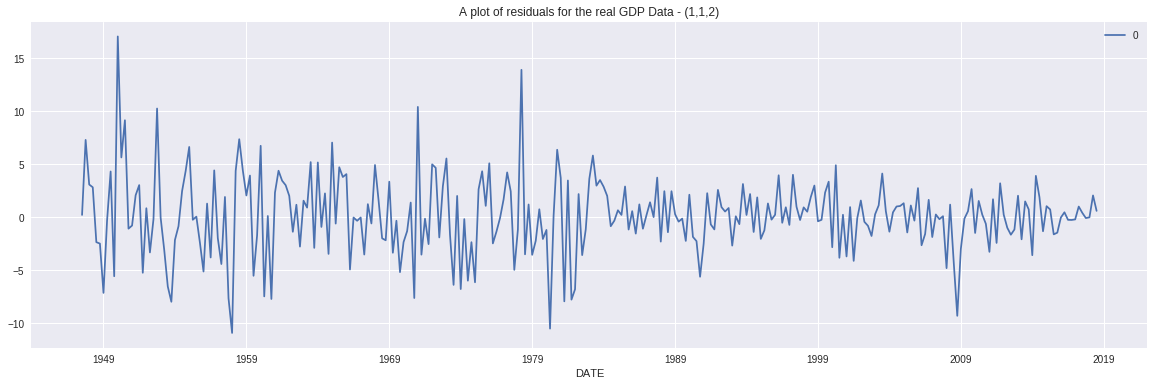

In [16]:
# Show results
print(model112_fit.summary())
print('Residuals Decription - Model 112')
resid = pd.DataFrame(model112_fit.resid)

# Plot residuals 
resid.plot()
plt.title('A plot of residuals for the real GDP Data - (1,1,2)')
plt.show()

# The lack of a trend in the residuals plot indicates that the model
# is well-tuned. Not necessary to alter the AR value or the order of differencing

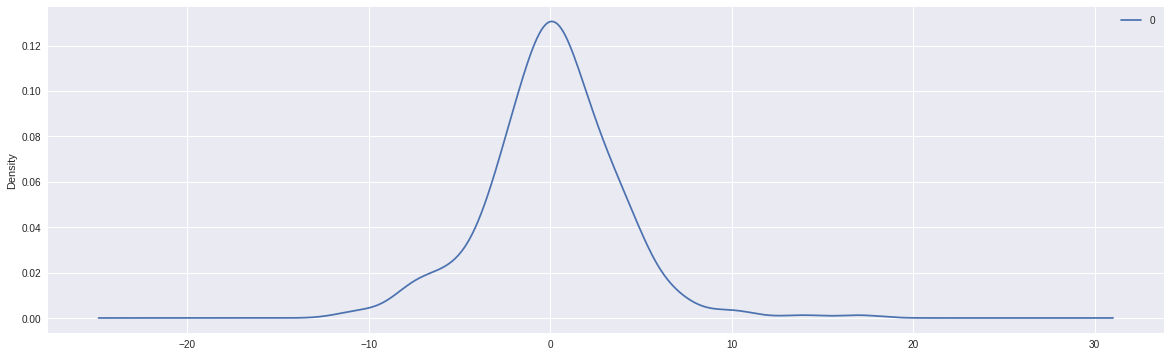

In [17]:
resid.plot(kind='kde')

# Values of the residuals are normally distributed

In [18]:
print(resid.describe())

# The mean value close to zero
# Again indicates that the model is well-tuned

                0
count  285.000000
mean     0.106557
std      3.623566
min    -10.923092
25%     -1.863043
50%      0.080069
75%      2.063244
max     17.033505


## ARIMA - (1,1,1) - did not converge

In [19]:
model111 = ARIMA(gdp, order=(1,1,1))
model111_fit = model111.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  285
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -770.382
Method:                       css-mle   S.D. of innovations              3.581
Date:                Wed, 09 Jan 2019   AIC                           1548.764
Time:                        00:19:30   BIC                           1563.374
Sample:                    07-01-1947   HQIC                          1554.621
                         - 07-01-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -1.988      0.048      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA     0.3452      0.056      6.166      0.000       0.235       0.455


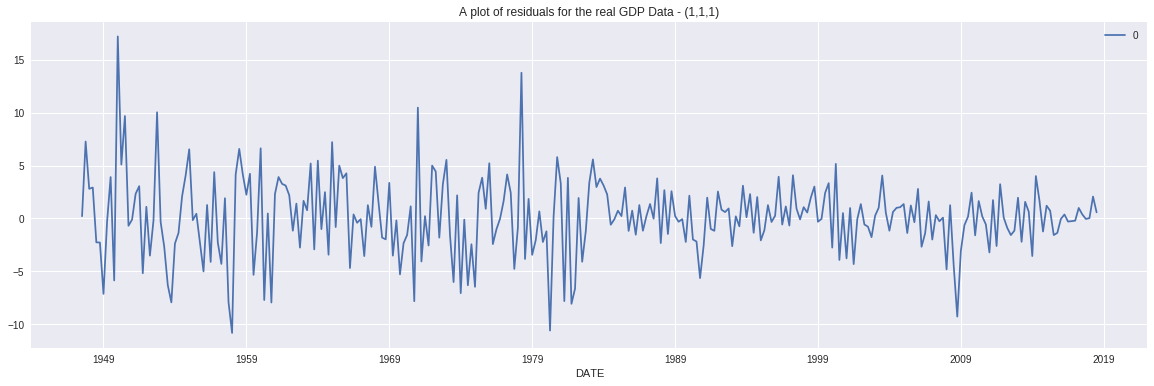

In [20]:
# Show results
print(model111_fit.summary())
print('Residuals Decription - Model 111')
resid = pd.DataFrame(model111_fit.resid)

# Plot residuals 
resid.plot()
plt.title('A plot of residuals for the real GDP Data - (1,1,1)')
plt.show()

# The lack of a trend in the residuals plot indicates that the model
# is well-tuned. Not necessary to alter the AR value or the order of differencing

In [21]:
print(resid.describe())

                0
count  285.000000
mean     0.108510
std      3.634849
min    -10.839748
25%     -1.818019
50%      0.157628
75%      2.180113
max     17.213239
